In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\devio\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\devio\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\devio\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\devio\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Read in data
df = pd.read_csv('TMobileISP.csv')
print(df.shape)


(413, 8)


In [3]:
df.head()

,MsgID,Timestamp,Author,ThreadID,ThreadTitle,MsgBody,ReplyTo,Permalink
0,'kxey1bk','2024-03-31 09:20:07','Outrageous-Bee4035','1bs9eqt','MLB Blackout','100%. Good thing we get MLBtv for free. Id he...,'kxextmg','/r/tmobileisp/comments/1bs9eqt/mlb_blackout/k...
1,'kxey8c0','2024-03-31 09:21:16','XxAlphaDonkeyxX','1bs9eqt','MLB Blackout','Oh for sure. That would be a scam','kxey1bk','/r/tmobileisp/comments/1bs9eqt/mlb_blackout/k...
2,'kxf1zik','2024-03-31 09:43:45','Slepprock','1brvhto','Port forwarding with my own router ','The CGNAT is probably the worst drawback of T...,'kxbpw7x','/r/tmobileisp/comments/1brvhto/port_forwardin...
3,'kxf2qaq','2024-03-31 09:48:12','rd1_vonn','1brvhto','Port forwarding with my own router ','Sadly it really is my only option we used to ...,'kxf1zik','/r/tmobileisp/comments/1brvhto/port_forwardin...
4,'kxf327n','2024-03-31 09:50:13','Slepprock','1brvhto','Port forwarding with my own router ','1984? In 1984 nobody had internet at home....,'kxbobfn','/r/tmobileisp/comments/1brvhto/port_forwardin...


In [4]:
example = df['MsgBody'][52]
print(example)

'I see. Add that to the list of reasons I wont switch to iPhone. I have a work iPhone and I get annoyed with it.'


In [5]:
tokens = nltk.word_tokenize(example)
tokens[:10]

["'", 'I', 'see', '.', 'Add', 'that', 'to', 'the', 'list', 'of']

In [6]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[("'", 'POS'),
 ('I', 'PRP'),
 ('see', 'VBP'),
 ('.', '.'),
 ('Add', 'VB'),
 ('that', 'IN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('list', 'NN'),
 ('of', 'IN')]

In [7]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  '/POS
  I/PRP
  see/VBP
  ./.
  Add/VB
  that/IN
  to/TO
  the/DT
  list/NN
  of/IN
  reasons/NNS
  I/PRP
  wont/VBP
  switch/VB
  to/TO
  iPhone/VB
  ./.
  I/PRP
  have/VBP
  a/DT
  work/NN
  (ORGANIZATION iPhone/NN)
  and/CC
  I/PRP
  get/VBP
  annoyed/VBN
  with/IN
  it/PRP
  ./.
  '/'')


In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [9]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [10]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [11]:
sia.polarity_scores(example)

{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.3818}

In [12]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['MsgBody']
    myid = row['MsgID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/413 [00:00<?, ?it/s]

In [13]:
print(df.columns)

Index(['MsgID', ' Timestamp', 'Author', 'ThreadID', 'ThreadTitle', 'MsgBody',
       'ReplyTo', 'Permalink'],
      dtype='object')


In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'MsgID'})
vaders = vaders.merge(df, how='left')

In [15]:
vaders.head()

,MsgID,neg,neu,pos,compound,Timestamp,Author,ThreadID,ThreadTitle,MsgBody,ReplyTo,Permalink
0,'kxey1bk',0.126,0.650,0.224,0.4019,'2024-03-31 09:20:07','Outrageous-Bee4035','1bs9eqt','MLB Blackout','100%. Good thing we get MLBtv for free. Id he...,'kxextmg','/r/tmobileisp/comments/1bs9eqt/mlb_blackout/k...
1,'kxey8c0',0.336,0.455,0.209,-0.3400,'2024-03-31 09:21:16','XxAlphaDonkeyxX','1bs9eqt','MLB Blackout','Oh for sure. That would be a scam','kxey1bk','/r/tmobileisp/comments/1bs9eqt/mlb_blackout/k...
2,'kxf1zik',0.098,0.810,0.092,-0.1389,'2024-03-31 09:43:45','Slepprock','1brvhto','Port forwarding with my own router ','The CGNAT is probably the worst drawback of T...,'kxbpw7x','/r/tmobileisp/comments/1brvhto/port_forwardin...
3,'kxf2qaq',0.071,0.858,0.071,0.0000,'2024-03-31 09:48:12','rd1_vonn','1brvhto','Port forwarding with my own router ','Sadly it really is my only option we used to ...,'kxf1zik','/r/tmobileisp/comments/1brvhto/port_forwardin...
4,'kxf327n',0.035,0.851,0.114,0.9541,'2024-03-31 09:50:13','Slepprock','1brvhto','Port forwarding with my own router ','1984? In 1984 nobody had internet at home....,'kxbobfn','/r/tmobileisp/comments/1brvhto/port_forwardin...


In [32]:
sentiment_counts = pd.DataFrame({
    'Sentiment': ['Negative', 'Neutral', 'Positive'],
    'Count': [vaders['neg'].sum(), vaders['neu'].sum(), vaders['pos'].sum()]
})
print(sentiment_counts)

  Sentiment    Count
0  Negative   18.508
1   Neutral  356.169
2  Positive   38.318


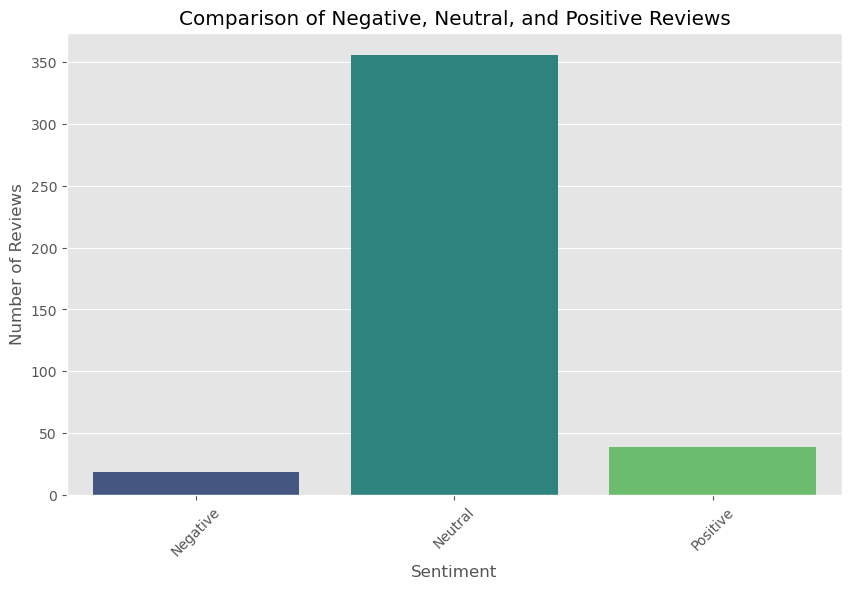

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_counts, x='Sentiment', y='Count', palette='viridis')
plt.title('Comparison of Negative, Neutral, and Positive Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)  # Rotates labels to prevent overlap
plt.show()

In [18]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


C:\Users\devio\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [20]:
print(example)
sia.polarity_scores(example)

'I see. Add that to the list of reasons I wont switch to iPhone. I have a work iPhone and I get annoyed with it.'


{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.3818}

In [21]:
# Run for Roberta Model
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [22]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['MsgBody']
        myid = row['MsgID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/413 [00:00<?, ?it/s]

In [23]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'MsgID'})
results_df = results_df.merge(df, how='left')

In [24]:
results_df.columns

Index(['MsgID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', ' Timestamp', 'Author',
       'ThreadID', 'ThreadTitle', 'MsgBody', 'ReplyTo', 'Permalink'],
      dtype='object')

In [31]:
results_df.head()
results_df.to_csv('TMobileISP_with_Sentiments.csv', index=False)

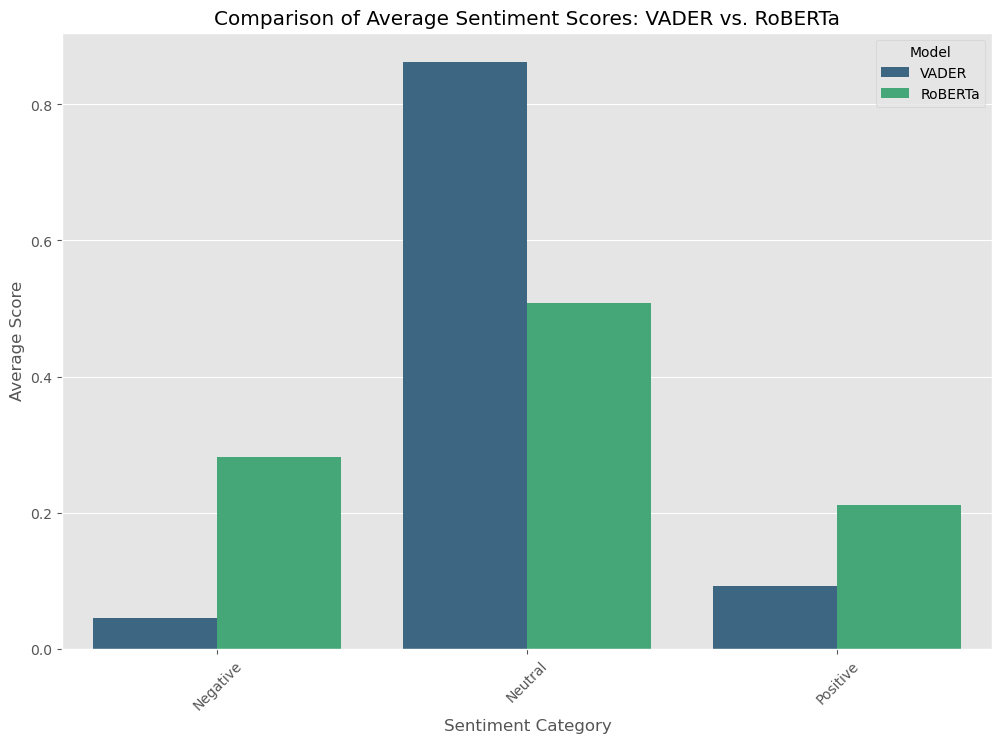

In [26]:
# import matplotlib.pyplot as plt

# # Calculating average sentiment scores for both VADER and RoBERTa
# avg_scores = pd.DataFrame({
#     'Sentiment Type': ['VADER', 'VADER', 'VADER', 'RoBERTa', 'RoBERTa', 'RoBERTa'],
#     'Sentiment': ['Negative', 'Neutral', 'Positive']*2,
#     'Score': [
#         results_df['vader_neg'].mean(), 
#         results_df['vader_neu'].mean(), 
#         results_df['vader_pos'].mean(),
#         results_df['roberta_neg'].mean(),
#         results_df['roberta_neu'].mean(),
#         results_df['roberta_pos'].mean()
#     ]
# })

# # Plotting the comparison
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Sentiment', y='Score', hue='Sentiment Type', data=avg_scores, palette='viridis')
# plt.title('Comparison of Average Sentiment Scores: VADER vs. RoBERTa')
# plt.xlabel('Sentiment Category')
# plt.ylabel('Average Score')
# plt.legend(title='Model')
# plt.xticks(rotation=45)
# plt.show()

In [27]:
# #Using Huggingface Pipeline - I have only tested this a bit

# from transformers import pipeline

# sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\devio\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [28]:
# def apply_sentiment_analysis(text):
#     try:
#         # This will return a list of dictionaries with keys 'label' and 'score'
#         return sent_pipeline(text)[0]
#     except Exception as e:
#         # Handle exceptions that could be raised by the transformers pipeline
#         return {"label": "Error", "score": 0.0, "error": str(e)}

# # Apply sentiment analysis to each row in the MsgBody column
# df['Sentiment Analysis'] = df['MsgBody'].apply(apply_sentiment_analysis)

# # Print the results
# for index, row in df.iterrows():
#     print(f"Message: {row['MsgBody']}")
#     print(f"Sentiment: {row['Sentiment Analysis']['label']}, Score: {row['Sentiment Analysis']['score']}")
#     print("--------------------------------------------------")

# # save the results to a new CSV file
# df.to_csv('TMobileISP_with_Sentiments.csv', index=False)

In [29]:
# model_name = "cardiffnlp/twitter-roberta-base-sentiment"
# roberta_sentiment = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)



# # Load the dataset
# df = pd.read_csv('TMobileISP.csv')

# # Define a function to apply sentiment analysis using RoBERTa
# def apply_roberta_sentiment(text):
#     try:
#         # Apply the sentiment analysis model
#         result = roberta_sentiment(text)
#         return result[0]
#     except Exception as e:
#         # Handle exceptions, e.g., if the text is too long for the model
#         return {"label": "Neutral", "score": 0.0, "error": str(e)}

# # Apply the sentiment analysis function to the MsgBody column
# df['Sentiment Result'] = df['MsgBody'].apply(apply_roberta_sentiment)

# # Extract the sentiment labels and scores
# df['Sentiment'] = df['Sentiment Result'].apply(lambda x: x['label'])
# df['Score'] = df['Sentiment Result'].apply(lambda x: x['score'])

# # Filter the DataFrame based on the sentiment labels
# df_positive = df[df['Sentiment'].str.upper() == 'POSITIVE']
# df_neutral = df[df['Sentiment'].str.upper() == 'NEUTRAL']
# df_negative = df[df['Sentiment'].str.upper() == 'NEGATIVE']

# # Save the filtered data to CSV files
# df_positive.to_csv('Positive_Sentiments_RoBERTa.csv', index=False)
# df_neutral.to_csv('Neutral_Sentiments_RoBERTa.csv', index=False)
# df_negative.to_csv('Negative_Sentiments_RoBERTa.csv', index=False)

# # Print out confirmation
# print("Files saved: Positive_Sentiments_RoBERTa.csv, Neutral_Sentiments_RoBERTa.csv, Negative_Sentiments_RoBERTa.csv")
